# KNN Project

This project is a simulation of a data science interview problem. Many times companies interviewing will provide a dataset with the feature names hidden to protect company information. The goal is to predict the correct class without knowing the feature names. For this particular problem the K-Nearest Neighbor algorithm will be used to classify a data point as part of the Target Class 0 or 1. 

The algorithm predicts the class of an observation based on the number of known observations around it. K represents the number of observations to consider. For example if the value of K is 11 the model will consider the closest 11 datapoints to determine the class of the new data point. The new data point is labeled with the class that has the highest number of data points of the 11 closest points. 

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline 

___
**Data Analysis and Visualization**

Here I read in the csv file and examine its contents via .head(). Since the data is artificially generated this is more for understanding the values to determine if scaling will be necessary - which is generally best practice. The pairplot is then used to separate out the Target Class based on the features. In this dataset there is not a significant separation between the two classes for a single combination of features, the closest may be TRAT vs GWYH.

In [6]:
data = pd.read_csv('KNN_Project_Data')

In [7]:
data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


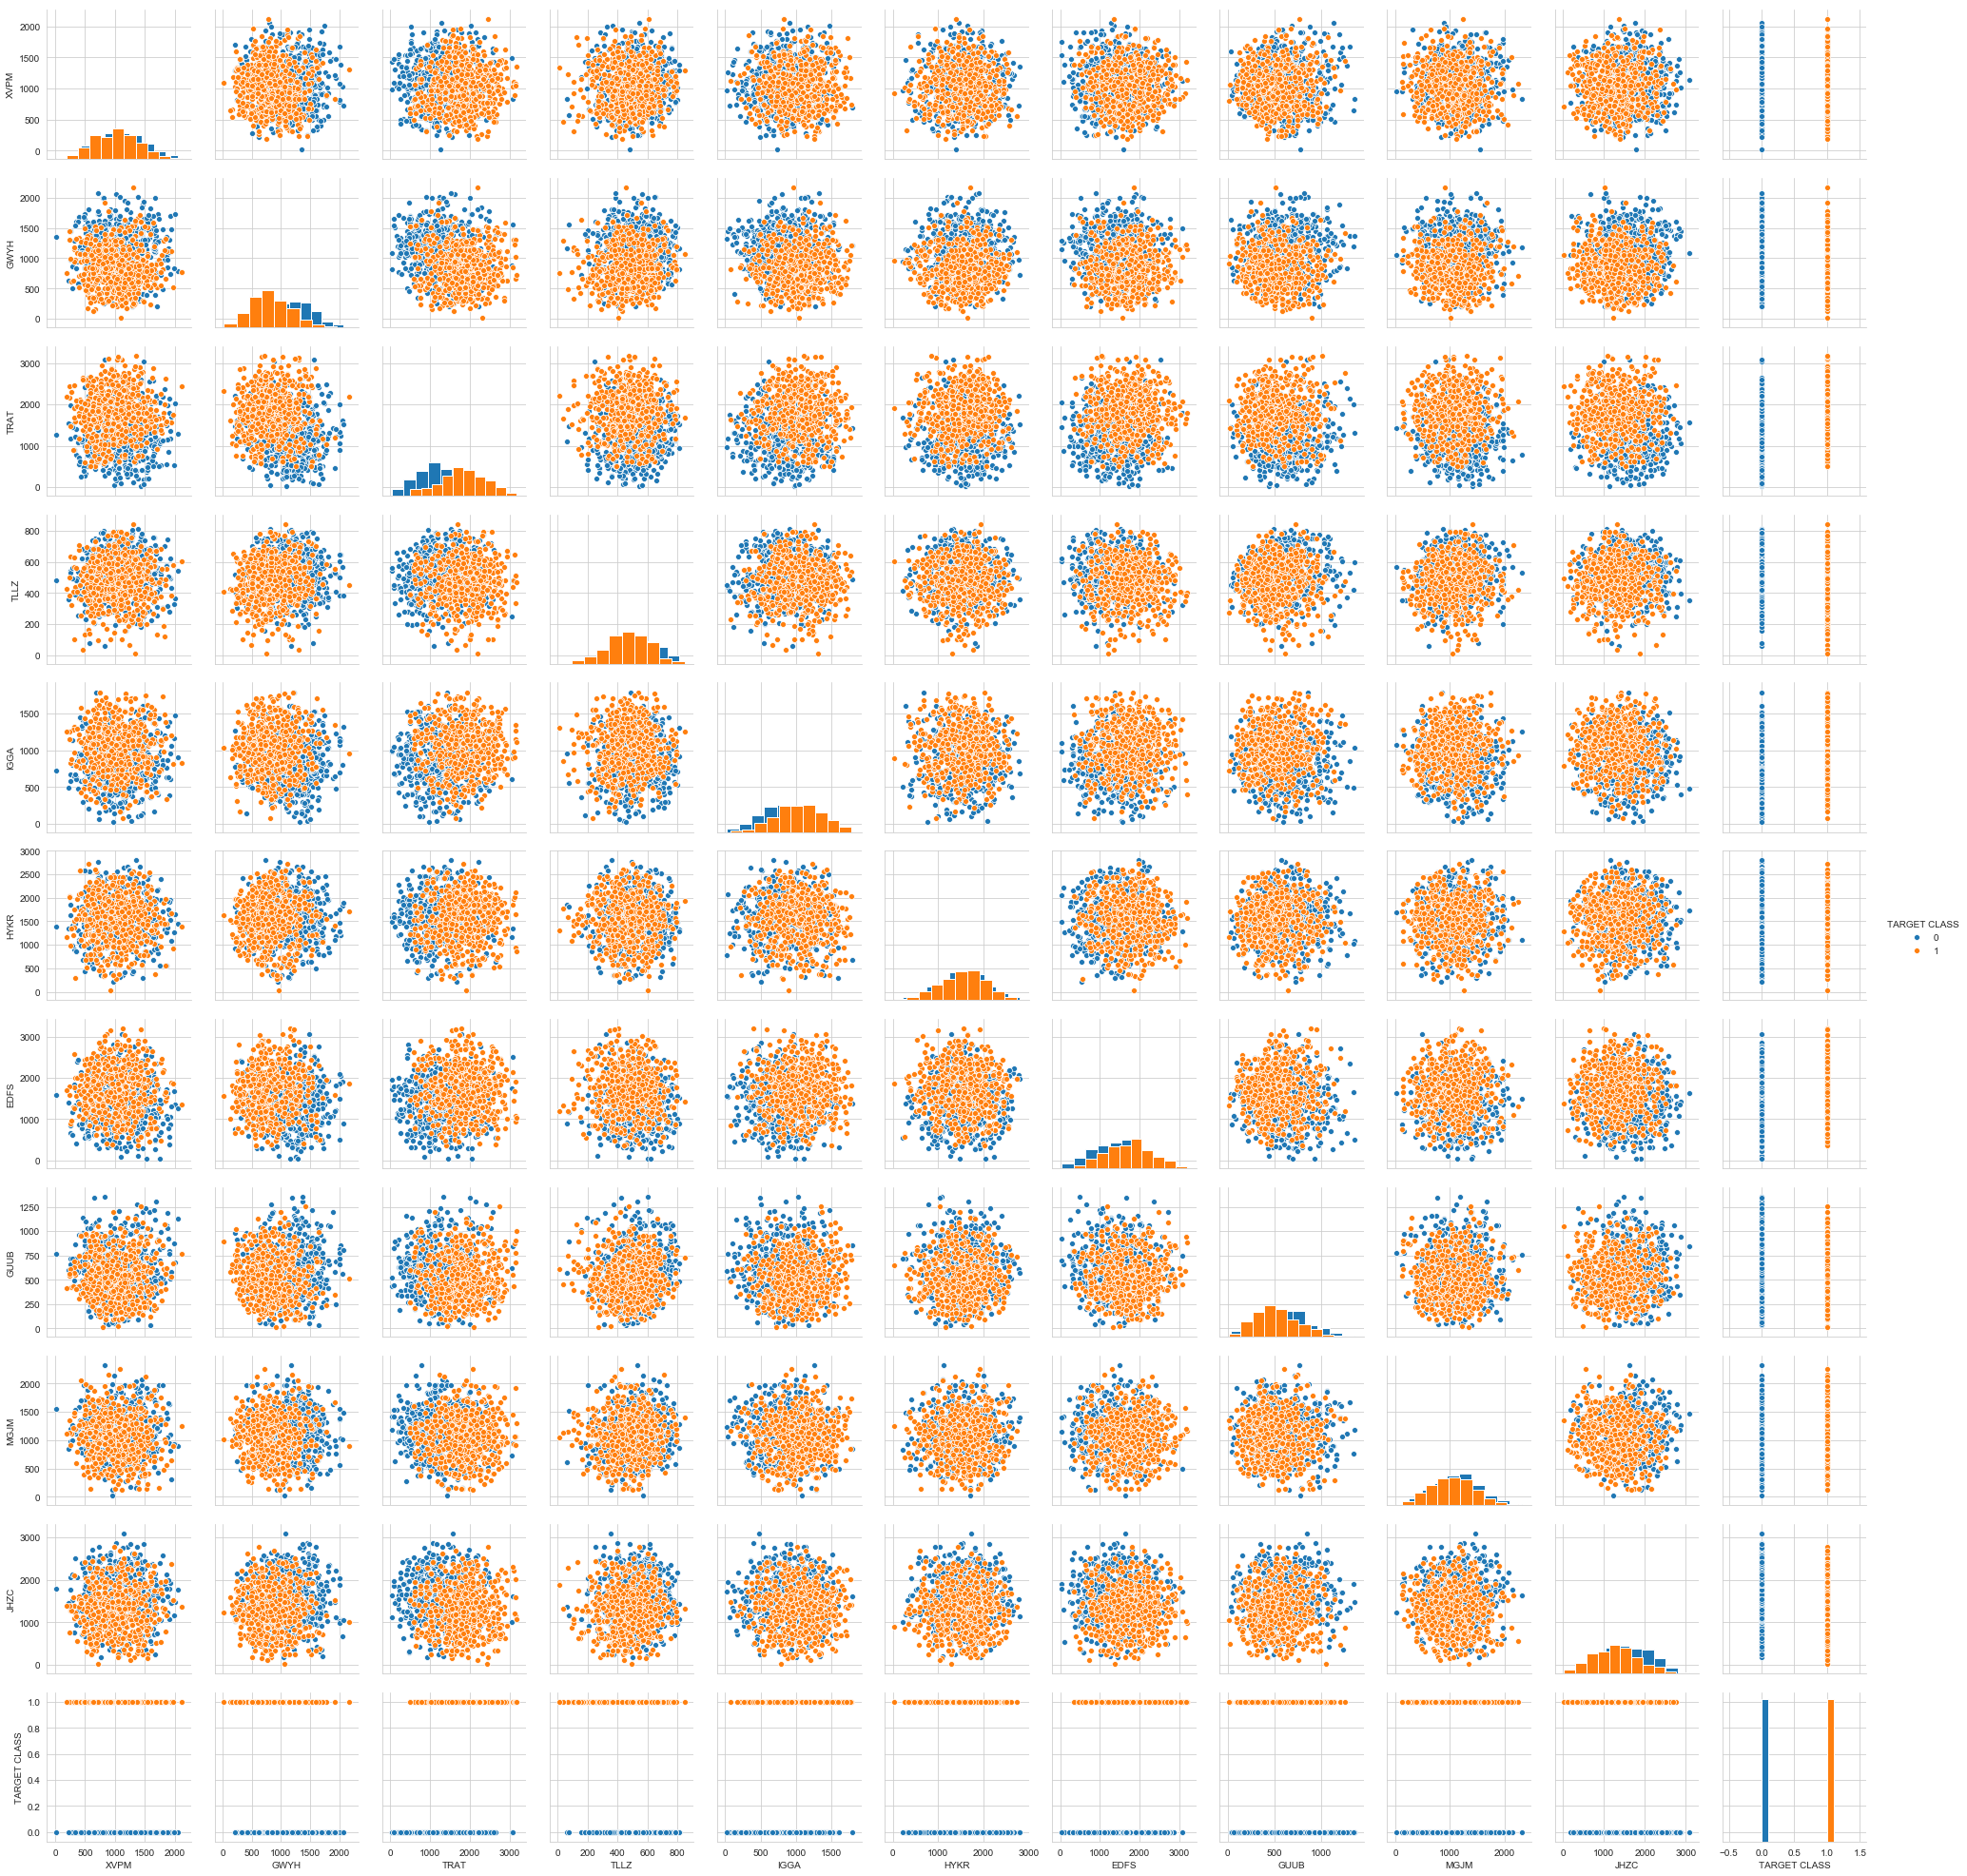

In [10]:
sns.pairplot(data, hue='TARGET CLASS', diag_kind='hist')

___
**Scaling**

Using KNN you want to standardize everything to the same scale. The method here is standardization using SciKit Learn StandardScaler. Here the data is centered around 0 using the z-score. The goal is to see better performance out of the model by not allowing one single feature to dominate the predicted outcome.

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [17]:
scaler.fit(data.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
scaled_feat = scaler.transform(data.drop('TARGET CLASS', axis=1))

___

**Training and Testing**

This is a supervised learning model, so the data will be split into training and testing sets. To begin the value for K is 1. This is equivalent to over-fitting the model. It will always have the lowest error on the training set but will have a high test error. This will be addressed later, using the elbow method to choose the K value.

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_feat, data['TARGET CLASS'], test_size=0.3, 
                                                    random_state=101)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn = KNeighborsClassifier(n_neighbors=1)

In [30]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

___

**Prediction and Evaluation**

Here the model is used to predict values from the test points. It is then evalueated with a classification report. It performs poorly being in the low 70s for both precision and recall. The elbow method will be used to improve the performance of the model.

In [31]:
predictions = knn.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

   micro avg       0.72      0.72      0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



___
**Elbow Method and Evaluation**

The elbow method is a graphical representation of the K value and error rate. The goal is to find a K value where the error rate is at a minimum. This is shown in the plot below to be around K=31 with an error rate of 0.16. A higher K value of 37 or 39 could have been used as well, however this would require more computational power with no improvement. Note it is good practice to choose an odd number for the K value so the outcome yields a class with a higher number of data points.

The classification report indicates that the model has improved both in precision and recall by 12 percentage points, which can be huge when classifying a business outcome.

In [36]:
error_rate = []
for i in range(1,40):
    knn_i = KNeighborsClassifier(n_neighbors = i)
    knn_i.fit(X_train, y_train)
    predict_i = knn_i.predict(X_test)
    error_rate.append(np.mean(predict_i != y_test))

Text(0, 0.5, 'Error Rate')

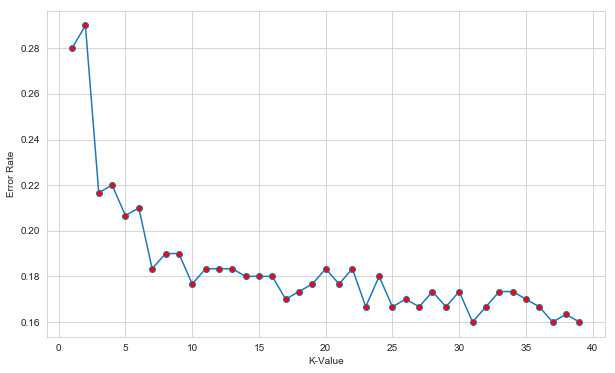

In [61]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, marker='o', mfc='red')
plt.xlabel('K-Value')
plt.ylabel('Error Rate')

In [45]:
knn_31 = KNeighborsClassifier(n_neighbors = 31)
knn_31.fit(X_train, y_train)
predict_31 = knn_i.predict(X_test)

In [47]:
print(confusion_matrix(y_test, predict_31))

[[125  27]
 [ 21 127]]


In [48]:
print(classification_report(y_test, predict_31))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       152
           1       0.82      0.86      0.84       148

   micro avg       0.84      0.84      0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



___
**Fitting Without Scaling**

I wanted to see the effect scaling had on the model. In order to do this effectively a new K value will need to be chosen using the elbow method. From the graph it appears the lowest value is 32. 

Based on the classification report overall the model loses 3% for both precision and recall. So scaling the model does improve the performance. 

Although there are general processes for getting a good model fit, it is important to make sure the steps that are taken are actually having the necessary effect. If they aren't then computational power is being wasted. For large datasets this can drastically effect production capabilities of algorithms.

In [74]:
X = data.drop('TARGET CLASS', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, data['TARGET CLASS'], test_size=0.3, 
                                                    random_state=101)

In [77]:
error_rate = []
for i in range(1,40):
    knn_i = KNeighborsClassifier(n_neighbors = i)
    knn_i.fit(X_train, y_train)
    predict_i = knn_i.predict(X_test)
    error_rate.append(np.mean(predict_i != y_test))

Text(0, 0.5, 'Error Rate')

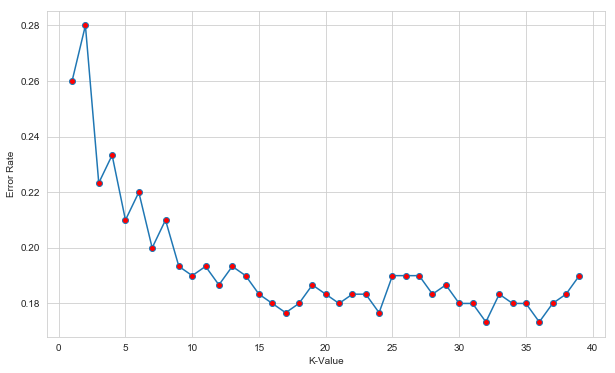

In [78]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, marker='o', mfc='red')
plt.xlabel('K-Value')
plt.ylabel('Error Rate')

In [81]:
knn_no_scale = KNeighborsClassifier(n_neighbors=32)
knn_no_scale.fit(X_train, y_train)
predict_no_scale = knn_i.predict(X_test)

In [82]:
print(classification_report(y_test, predict_no_scale))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81       152
           1       0.79      0.84      0.81       148

   micro avg       0.81      0.81      0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



___
**Conclusion**

Given the current data set a KNN algorithm with K=31 and a standardized dataset was able to generate a precision and recall of 84%. Depending on the requirements of the company this can be either good or bad. If this was a realistic scenario it may be worth attempting other classification algorithms to see if a better model can be created.
